<a href="https://colab.research.google.com/github/lucianetedesco/iris-classification/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizando Decision Tree e Random Forest para classificação da flor Iris.

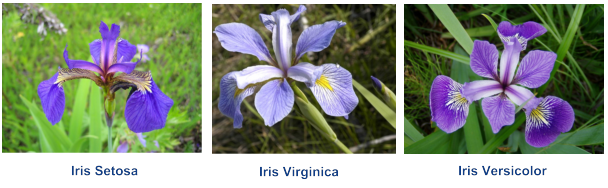

Informações sobre o atributo:
   1. comprimento da sépala em cm
   2. largura sépala em cm
   3. comprimento da pétala em cm
   4. largura da pétala em cm
   5. classe:
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

Petal (pétala) e sepal (sépala) são partes da flor, são fornecidas as dimensões em centímetros dessas partes e com isso devemos classificar a flor entre Iris Setosa, Versicolour ou Virginica.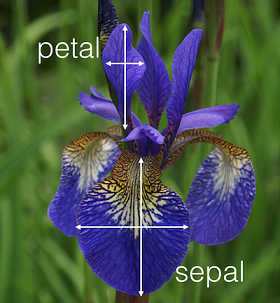

### Analisando os dados

In [ ]:
import pandas as pd

names = [
         'SepalLength', 
         'SepalWidth',
         'PetalLength', 
         'PetalWidth',
         'Class'
         ]
df = pd.read_csv('https://github.com/lucianetedesco/iris-classification/blob/main/dataset/iris.csv', names=names)

In [ ]:
print("Linhas: %d, Colunas: %d" % (len(df), len(df.columns)))

Linhas: 1947, Colunas: 5


In [ ]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

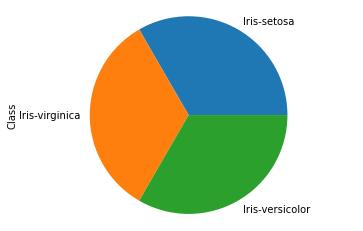

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='pie')
plt.axis('equal');

### Criando features

In [ ]:
# Como temos largura e comprimento, podemos criar uma feature de area
df['SepalArea'] = df['SepalLength'] * df['SepalWidth']
df['PetalArea'] = df['PetalLength'] * df['PetalWidth']

# Vamos tirar a media de cada feature e criar uma feature boleana
# que marca linha por linha se esses valores estao acima da media.
df['SepalLengthAboveMean'] = df['SepalLength'] > df['SepalLength'].mean()
df['SepalWidthAboveMean'] = df['SepalWidth'] > df['SepalWidth'].mean()

df['PetalLengthAboveMean'] = df['PetalLength'] > df['PetalLength'].mean()
df['PetalWidthAboveMean'] = df['PetalWidth'] > df['PetalWidth'].mean()

df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,SepalArea,PetalArea,SepalLengthAboveMean,SepalWidthAboveMean,PetalLengthAboveMean,PetalWidthAboveMean
0,5.1,3.5,1.4,0.2,Iris-setosa,17.85,0.28,False,True,False,False
1,4.9,3.0,1.4,0.2,Iris-setosa,14.70,0.28,False,False,False,False
2,4.7,3.2,1.3,0.2,Iris-setosa,15.04,0.26,False,True,False,False
3,4.6,3.1,1.5,0.2,Iris-setosa,14.26,0.30,False,True,False,False
4,5.0,3.6,1.4,0.2,Iris-setosa,18.00,0.28,False,True,False,False


### Preparando os dados

In [ ]:
features = df.columns.difference(['Class'])
classes = df['Class'].unique()

X = df[features].values
y = df['Class'].values

print(features)
print(classes)

Index(['PetalArea', 'PetalLength', 'PetalLengthAboveMean', 'PetalWidth',
       'PetalWidthAboveMean', 'SepalArea', 'SepalLength',
       'SepalLengthAboveMean', 'SepalWidth', 'SepalWidthAboveMean'],
      dtype='object')
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=1986,
                                       criterion='gini', 
                                       max_depth=3)
classifier_dt.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1986, splitter='best')

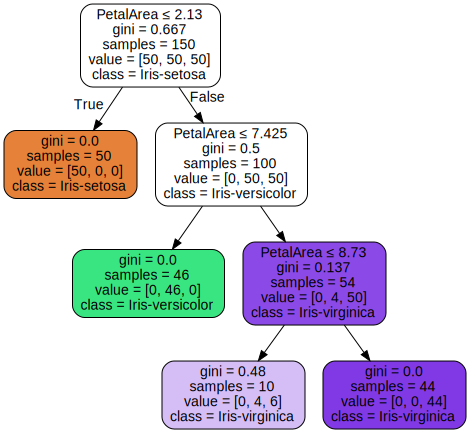

In [ ]:
import graphviz 
# Exemplo de uma árvore de decisão gerada a partir de um treinamento
dot_data = tree.export_graphviz(classifier_dt, 
                                out_file=None, 
                                feature_names=features,  
                                class_names=classes,  
                                filled=True, 
                                rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


### Amostras de previsão

In [ ]:
#Exemplos que serao utilizados para validar o modelo
sample1 = [1.0, 2.0, 3.5, 1.0, 10.0, 3.5, False, False, False, False]  # Iris-setosa
sample2 = [5.0, 3.5, 1.3, 0.2, 17.8, 0.2, False, True, False, False]   # Iris-versicolor
sample3 = [7.9, 5.0, 2.0, 1.8, 19.7, 9.1, True, False, True, True]     # Iris-virginica

classifier_dt.predict([sample1, sample2, sample3])  # Predizendo o tipo da flor

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_dt, 
                            X, 
                            y, 
                            scoring='accuracy', 
                            cv=5)
print(scores_dt.mean())

0.9533333333333334


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1986, 
                                       n_estimators=50, 
                                       max_depth=5, 
                                       n_jobs=-1)
classifier_rf.fit(X, y)

scores_rf = cross_val_score(classifier_rf, 
                            X, 
                            y, 
                            scoring='accuracy', 
                            cv=5)
print(scores_rf.mean())

0.96


### Feature Importance

In [ ]:
classifier_rf.fit(X, y)

features_importance = zip(classifier_rf.feature_importances_, features)
for importance, feature in sorted(features_importance, reverse=True):
    print("%s: %f%%" % (feature, importance*100))

PetalArea: 31.614805%
PetalWidth: 29.375897%
PetalLength: 21.629776%
PetalLengthAboveMean: 7.188185%
SepalLength: 3.115694%
SepalArea: 2.513482%
SepalWidth: 1.804071%
PetalWidthAboveMean: 1.678833%
SepalLengthAboveMean: 0.853007%
SepalWidthAboveMean: 0.226249%


### Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [25, 50, 75],
            "bootstrap": [False, True],
            "max_depth": [3, 5, 10],
            "max_features": ['auto', 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(classifier_rf, param_grid, scoring="accuracy")
grid_search.fit(X, y)

classifier_rf = grid_search.best_estimator_ 

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9733333333333334
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 25}


Referência: http://carlosbaia.com/2016/12/24/decision-tree-e-random-forest/